# pre requisites - imports

In [1]:
#!pip install pandas
#!pip install matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings
from numpy.linalg import matrix_rank, inv
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

# saying hello to your data

In [3]:
df = pd.read_csv("G:/My Drive/Artificial intelligence/data sets/titanic/test.csv")
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**check list**
- check if intergers are cast as float
- decide if column should be of int or float (based on meaning of column name and other mentioned below) **important for pdf , pmf**
    - if increasing bin sizes breaks the hist, den its dicrete
    - discrete numbers typically be of int type (check using unique and hist)
    - continous numbers typically be of float type (check using unique and hist)
- strings should be of object type

In [4]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.shape

(418, 11)

In [6]:
df["Age"].unique()
#df["Cabin"].unique()[0:10]

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

<AxesSubplot: >

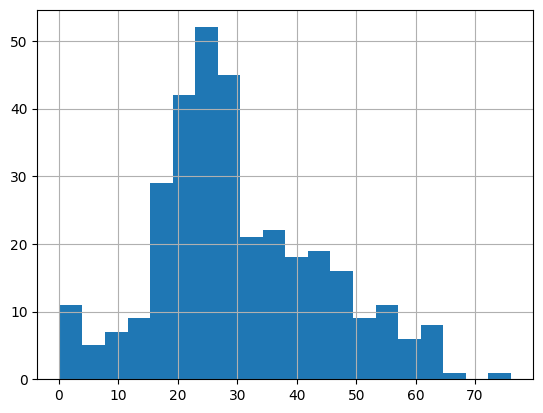

In [7]:
df["Age"].hist(bins=20)

Text(0.5, 1.0, 'Cardinality')

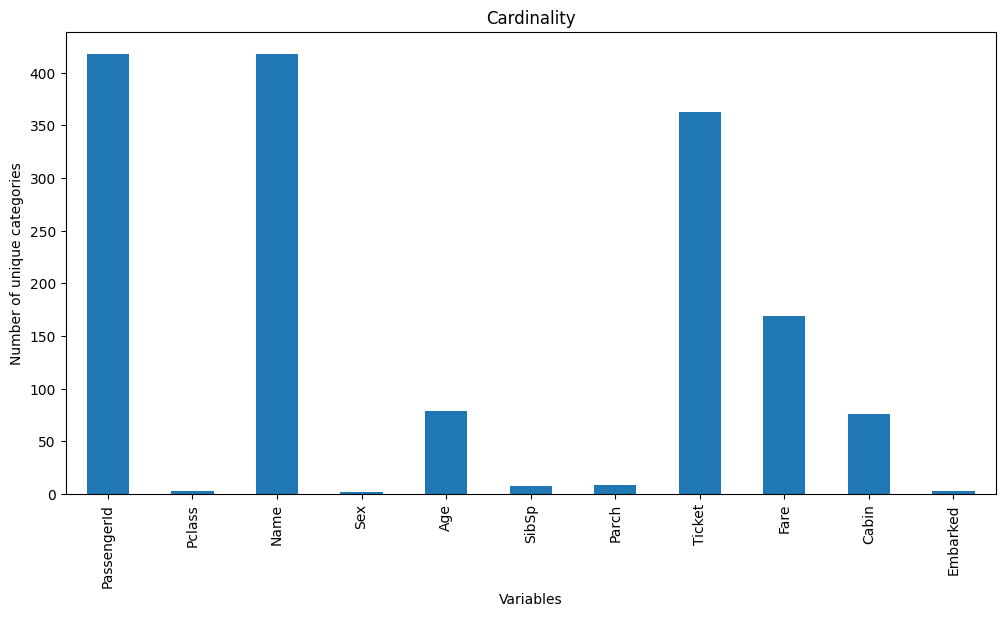

In [8]:
df.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

# Quantitative description of missing data

## for numbers with NA

In [9]:
cols = ['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT',
'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML','MAGFEM', 'MAGMALE']
df=pd.read_csv("G:/My Drive/Artificial intelligence/data sets/kddcup98-dataset/cup98LRN.txt",usecols=cols)
df.head()

,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46.0,1.0,6.0,9.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0
2,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,70.0,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,1.0,3.0,2.0,1.0,0.0,9.0,0.0,4.0,1.0,0.0


In [10]:
df.shape,df.dtypes

((95412, 11),
 AGE         float64
 NUMCHLD     float64
 INCOME      float64
 WEALTH1     float64
 MBCRAFT     float64
 MBGARDEN    float64
 MBBOOKS     float64
 MBCOLECT    float64
 MAGFAML     float64
 MAGFEM      float64
 MAGMALE     float64
 dtype: object)

In [11]:
# analyst count of isnull and sorting
df.isnull().sum().sort_values(ascending=True)

AGE         23665
NUMCHLD     83026
INCOME      21286
WEALTH1     44732
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
dtype: int64

In [12]:
# analyse percentage of isnull and sorting
df.isnull().mean().sort_values(ascending=True) # divides by length of df

AGE         0.248030
NUMCHLD     0.870184
INCOME      0.223096
WEALTH1     0.468830
MBCRAFT     0.553955
MBGARDEN    0.553955
MBBOOKS     0.553955
MBCOLECT    0.554584
MAGFAML     0.553955
MAGFEM      0.553955
MAGMALE     0.553955
dtype: float64

In [13]:
df.nunique(dropna=False) # also considers NAN as category

AGE         97
NUMCHLD      8
INCOME       8
WEALTH1     11
MBCRAFT      8
MBGARDEN     6
MBBOOKS     11
MBCOLECT     8
MAGFAML     10
MAGFEM       7
MAGMALE      6
dtype: int64

## quantifying missing data

Text(0.5, 1.0, 'Quantifying missing data for df=(95412, 11)')

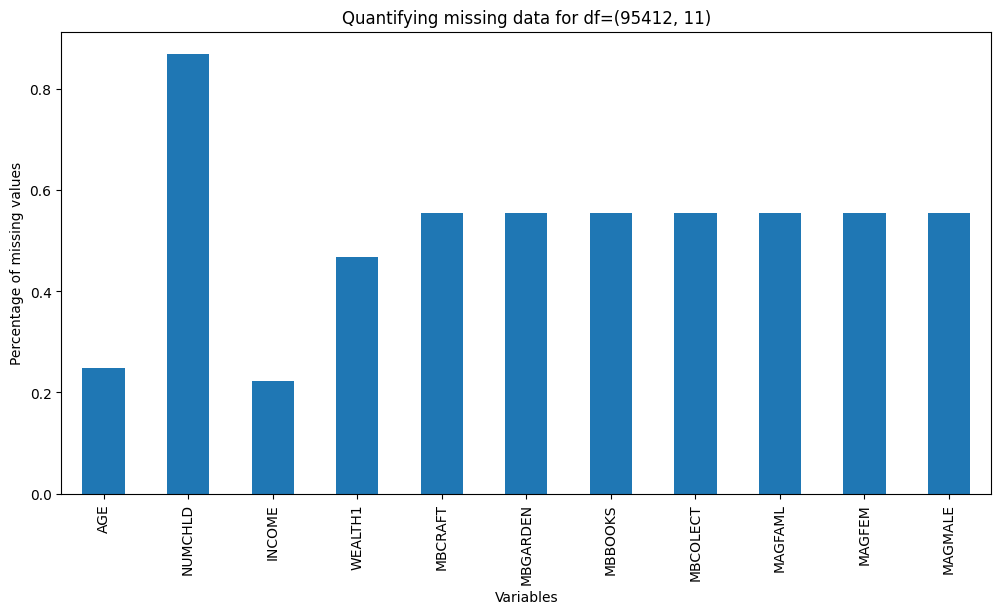

In [14]:
df.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title(f'Quantifying missing data for df={df.shape}')

In [15]:
df.nunique()

AGE         96
NUMCHLD      7
INCOME       7
WEALTH1     10
MBCRAFT      7
MBGARDEN     5
MBBOOKS     10
MBCOLECT     7
MAGFAML      9
MAGFEM       6
MAGMALE      5
dtype: int64

# identification of empty string for categorical variable

In [16]:
cols = ['GENDER', 'RFA_2', 'MDMAUD_A', 'RFA_2', 'DOMAIN', 'RFA_15']
df = pd.read_csv('G:/My Drive/Artificial intelligence/data sets/kddcup98-dataset/cup98LRN.txt', usecols=cols)
df.head()

,DOMAIN,GENDER,RFA_2,RFA_15,MDMAUD_A
0,T2,F,L4E,S4E,X
1,S1,M,L2G,,X
2,R2,M,L4E,S4F,X
3,R2,F,L4E,S4E,X
4,S2,F,L2F,,X


In [17]:
df.nunique(dropna=False) # also considers NAN as category

DOMAIN      17
GENDER       7
RFA_2       14
RFA_15      34
MDMAUD_A     5
dtype: int64

In [18]:
df["RFA_15"].str.isspace().sum() # checks if space is present

65477

In [19]:
b ="  bs ss"
c=b.replace("  ","v") # replaces string with two concsecutive space with v 
c

'vbs ss'

In [20]:
a= " a " # this fails because it checks between words
a.isspace()

False

In [21]:
def empty_checker(input_):
    if input_.isspace():
        return np.nan
    else:
        return input_


In [22]:
df['RFA_15'].unique()

array(['S4E', ' ', 'S4F', 'A2F', 'S2G', 'A3F', 'S3D', 'S3E', 'A2G', 'A1G',
       'A3G', 'A4F', 'A4E', 'N2E', 'S4D', 'S4G', 'S3F', 'A4G', 'S2F',
       'N2F', 'N2G', 'A3E', 'S3G', 'N3D', 'A3D', 'N3E', 'A4D', 'N3G',
       'N4E', 'N3F', 'N4D', 'N4G', 'N4F', 'U1F'], dtype=object)

In [23]:
temp_id=4
df[df.columns[temp_id]]=df[df.columns[temp_id]].apply(lambda x:empty_checker(x))
df.head()


,DOMAIN,GENDER,RFA_2,RFA_15,MDMAUD_A
0,T2,F,L4E,S4E,X
1,S1,M,L2G,,X
2,R2,M,L4E,S4F,X
3,R2,F,L4E,S4E,X
4,S2,F,L2F,,X


In [24]:
df["GENDER"].unique()

array(['F', 'M', ' ', 'C', 'U', 'J', 'A'], dtype=object)

In [25]:
df.nunique(dropna=False)

DOMAIN      17
GENDER       7
RFA_2       14
RFA_15      34
MDMAUD_A     5
dtype: int64

In [26]:
df.RFA_15.unique()

array(['S4E', ' ', 'S4F', 'A2F', 'S2G', 'A3F', 'S3D', 'S3E', 'A2G', 'A1G',
       'A3G', 'A4F', 'A4E', 'N2E', 'S4D', 'S4G', 'S3F', 'A4G', 'S2F',
       'N2F', 'N2G', 'A3E', 'S3G', 'N3D', 'A3D', 'N3E', 'A4D', 'N3G',
       'N4E', 'N3F', 'N4D', 'N4G', 'N4F', 'U1F'], dtype=object)

## cardinaty visualziation

Text(0.5, 1.0, 'Cardinality')

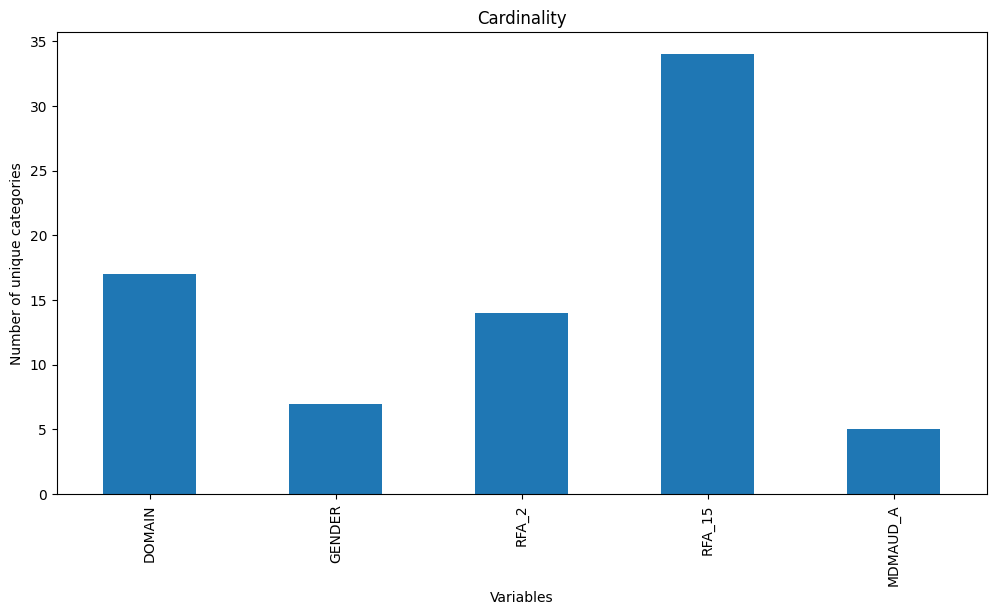

In [27]:
df.nunique().plot.bar(figsize=(12,6)) #excluding null values
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

# understanding rare categories

- A  label to be rare when it appears in less than
5% or 1% of the population ( **based on normal distribution idea**)

In [28]:
df = pd.read_csv('G:\My Drive\Artificial intelligence\data sets\car\car.data', header=None)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot',
'safety', 'class']
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<AxesSubplot: >

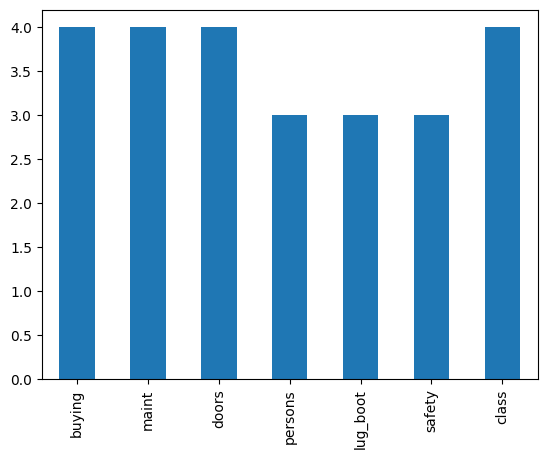

In [29]:
df.nunique(dropna=False).plot.bar()

In [30]:
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [31]:
label_freq = df['class'].value_counts(normalize=True)
print(label_freq)


unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64


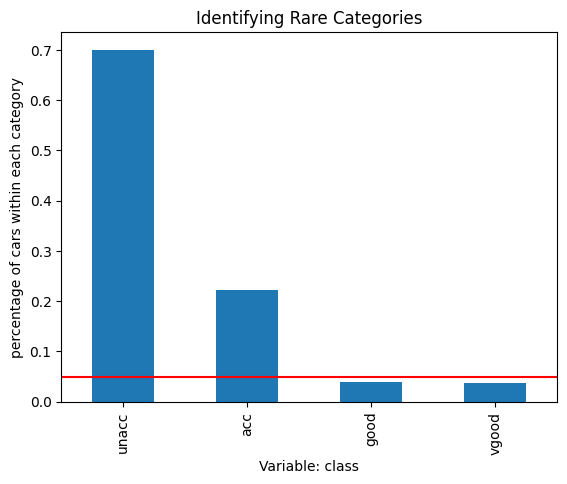

In [32]:
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red') # using 5 % law
fig.set_ylabel('percentage of cars within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()


# identifying a linear relationship

**Holy grail**
https://www.statology.org/linear-regression-assumptions/

In [33]:
np.random.seed(29)
x = np.random.randn(200)
y=x*10
z = x * 10 + np.random.randn(200) * 2
df = pd.DataFrame([x, y,z]).T
df.columns = ['x', 'y',"z"]

## test for linear relationship

1. testing linearity based on pearson's co-relation 
    1. linear relationship exists between variables (test visually using scatter plot)
    2. variables are normally distributed (verify using qq plot)
    3. no outliers (handle using techniques)
2. homoscadesitcity and normality :
    1.  If the relationship is linear, the residuals should be normally distributed and centered around zero. (verify using qq plot and histogram)
    2. if the relationship is linear, the residuals vs predictions should not have a cone like pattern(verify using scatter plot)
3. residual independence - if the relationship is linear,in the residuals vs independent variables the noise should be random, centered around zero, and follow a normal distribution like a circle . (verify using scatter plot)
4. independence of variables multicollinearity ( there is a seperate file to detect this)

## pearson's correlation test

<AxesSubplot: xlabel='x', ylabel='y'>

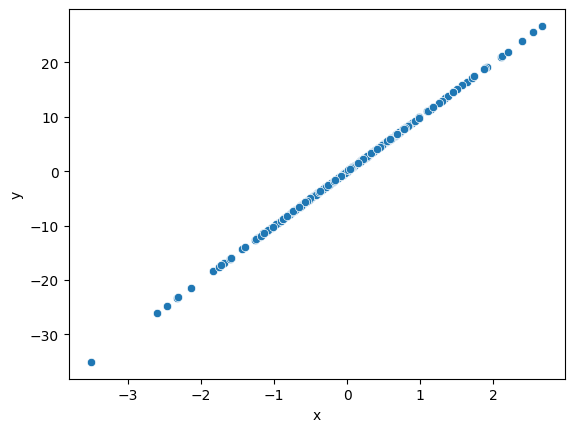

In [34]:
sns.scatterplot(x=df['x'],y=df['y'],data=df)

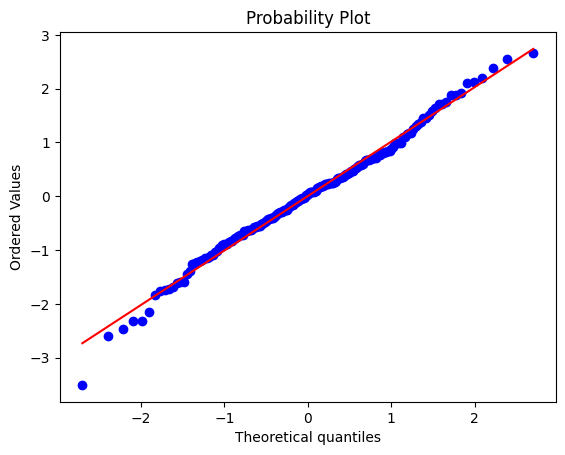

In [35]:
stats.probplot(df['x'], dist="norm", plot=plt)
plt.show()


In [36]:
df.corr()

,x,y,z
x,1.000000,1.000000,0.980284
y,1.000000,1.000000,0.980284
z,0.980284,0.980284,1.000000


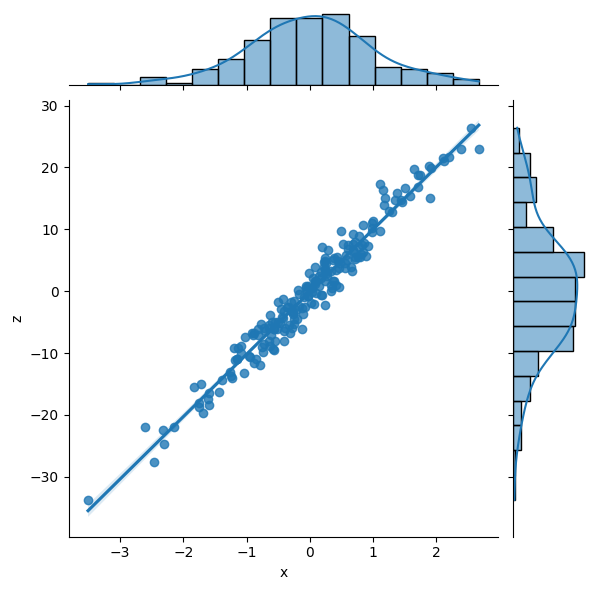

In [37]:
sns.jointplot(data=df, x="x", y="z", kind="reg", order=1) #order 1 , means lettin sns do computation

## handling outliers

In [38]:
boston = pd.read_csv("G:/My Drive/Artificial intelligence/data sets/boston-data-set/boston.csv")
boston.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
B             float64
LSTAT         float64
Price         float64
dtype: object

Text(0.5, 1.0, 'Boxplot')

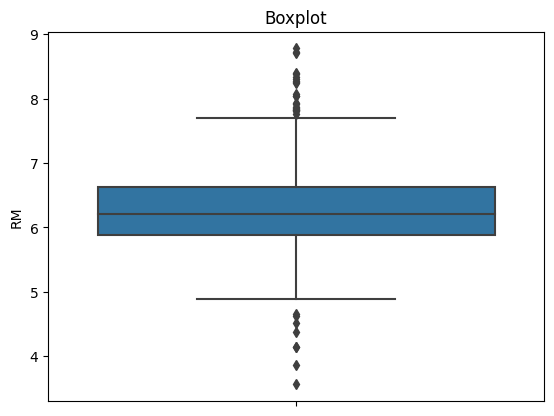

In [39]:
sns.boxplot(y=boston['RM'],whis=1.5)
plt.title('Boxplot')

In [40]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary,df[variable].quantile(0.5), lower_boundary


In [41]:
upper_boundary,median, lower_boundary=find_boundaries(boston, 'RM', 1.5)

In [42]:
outlier_pos=boston[(boston['RM'] < lower_boundary) | (boston['RM'] > upper_boundary)].index
boston.drop(outlier_pos,axis=0)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## normality of the residuals

In [43]:
np.random.seed(29)
x = np.random.randn(200)
y = x * 10 + np.random.randn(200) * 2
data = pd.DataFrame([x, y]).T
data.columns = ['x', 'y']


In [44]:
linreg = LinearRegression()
linreg.fit(data['x'].to_frame(), data['y'])
predictions = linreg.predict(data['x'].to_frame())
residuals = data['y'] - predictions


Text(0.5, 0, 'Residuals')

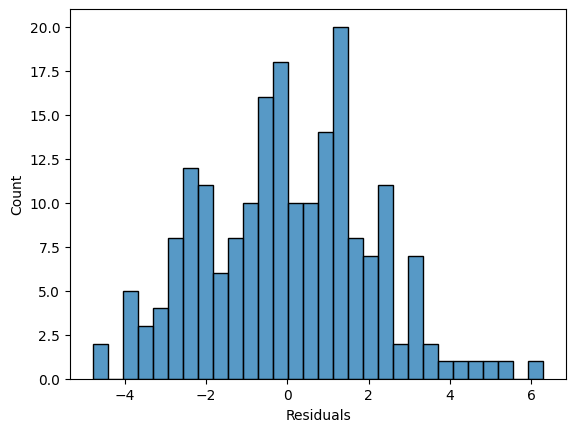

In [45]:

sns.histplot(residuals, bins=30)
plt.xlabel('Residuals')


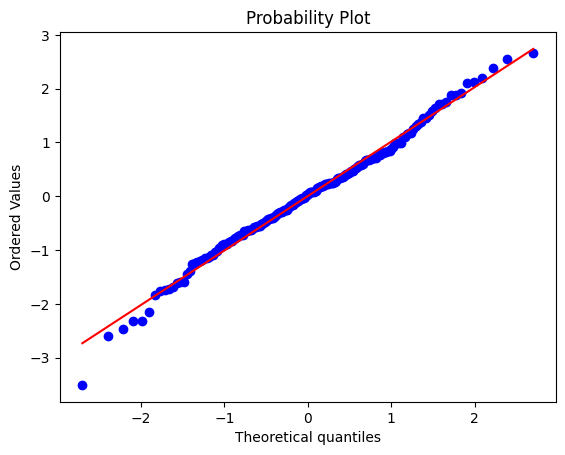

In [46]:
stats.probplot(df['x'], dist="norm", plot=plt)
plt.show()

# residual independence

Text(0.5, 0, 'Independent variable x')

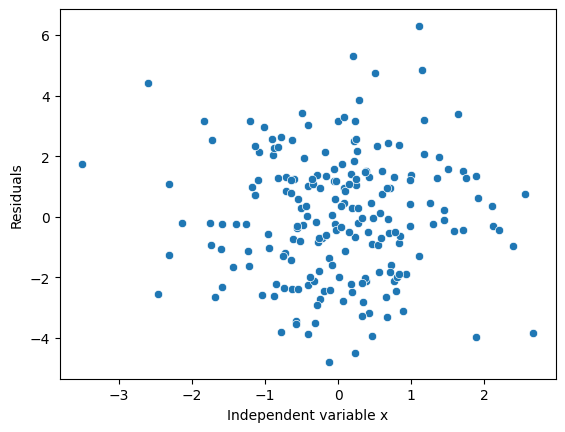

In [47]:
sns.scatterplot(y=residuals, x=data['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

# homoscadisticity

no cone analogy

Text(0.5, 0, 'target variable x')

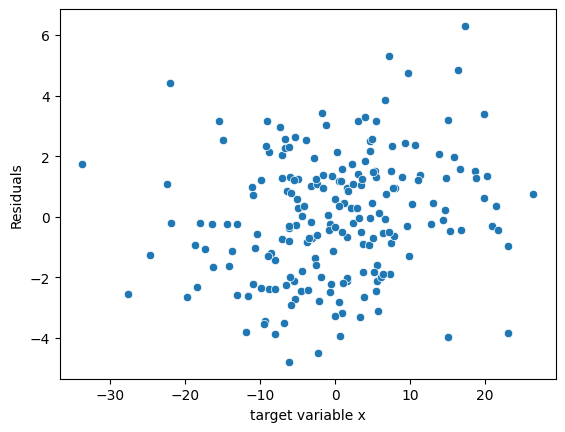

In [48]:
sns.scatterplot(y=residuals, x=data['y'])
plt.ylabel('Residuals')
plt.xlabel('target variable x')